In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report, multilabel_confusion_matrix
import matplotlib.pyplot as plt 
from matplotlib.patches import Patch
%matplotlib inline

In [2]:
path = os.getcwd()
files_true = os.listdir(path+'/data_true')
files_pred = os.listdir(path+'/data_pred')

In [3]:
df_true = pd.DataFrame()
for f in files_true:
    if f.endswith('.xlsx'):
        data = pd.read_excel('data_true/'+f,engine='openpyxl')
        data=data.drop(['Text'],axis =1,errors='ignore')
        df_true = df_true.append(data)

In [4]:
df_pred = pd.DataFrame()
for f in files_pred:
    if (f.endswith('.xlsx')) and (f in files_true):
        data = pd.read_excel('data_pred/'+f,engine='openpyxl')
        data=data.drop(['Text'],axis =1,errors='ignore')
        df_pred = df_pred.append(data)

In [5]:
df_true = df_true[df_true['Entity'].notna()]

In [6]:
df_true.shape

(419, 2)

In [7]:
df_pred.shape

(325, 2)

In [8]:
df = pd.merge(df_true, df_pred, on=['Entity'], how='outer').drop_duplicates().fillna("O")

In [9]:
df.columns = ['Entity','y_true','y_pred']

In [10]:
df.shape

(287, 3)

In [11]:
y_true = df.iloc[:,1]

In [12]:
y_pred =  df.iloc[:,2]

### Métriques globales

In [13]:
accuracy_score(y_true, y_pred)

0.5226480836236934

In [14]:
recall_score(y_true, y_pred, average="macro")

0.6872122804731501

In [15]:
precision_score(y_true, y_pred, average="macro")

0.7861472448057814

In [16]:
f1_score(y_true, y_pred,average="macro")

0.726726016492334

### Métriques par entité

In [17]:
classes = np.unique(y_true)
classes = classes.tolist()

In [18]:
print(classification_report(y_true, y_pred , labels=classes))

               precision    recall  f1-score   support

         DATE       1.00      1.00      1.00         2
        EMAIL       1.00      0.96      0.98        23
FAMILY_STATUS       1.00      1.00      1.00         2
         LANG       1.00      0.62      0.76        13
          LOC       0.67      0.52      0.59       105
            O       0.00      0.00      0.00        52
          PER       0.74      0.71      0.73        28
      PERIODE       0.45      0.55      0.49        33
          TEL       1.00      0.85      0.92        20
          URL       1.00      0.67      0.80         9

     accuracy                           0.52       287
    macro avg       0.79      0.69      0.73       287
 weighted avg       0.61      0.52      0.56       287



In [19]:
multilabel_confusion_matrix(y_true, y_pred)

array([[[285,   0],
        [  0,   2]],

       [[264,   0],
        [  1,  22]],

       [[285,   0],
        [  0,   2]],

       [[274,   0],
        [  5,   8]],

       [[155,  27],
        [ 50,  55]],

       [[154,  81],
        [ 52,   0]],

       [[252,   7],
        [  8,  20]],

       [[232,  22],
        [ 15,  18]],

       [[267,   0],
        [  3,  17]],

       [[278,   0],
        [  3,   6]]])

### Erreurs détectées par label

In [20]:
regex_list = ['TEL','PERIODE','EMAIL','LANG', 'URL', 'DATE']
regex_error_count = 0
model_list = ['PER','LOC']
model_error_count = 0

In [21]:
dict_error_regex = {}
dict_error_model = {}
df_error = df.loc[(df['y_true']!=df['y_pred'])]

In [22]:
for item in df['y_true'].unique():
    if(((len(df_error.loc[df_error['y_true']==item])>0)|(len(df_error.loc[df_error['y_pred']==item])>0)) & (item!='O') ):      
        if(item in regex_list):
            regex_error_count = regex_error_count+len(df_error.loc[(df_error['y_true']==item)|(df_error['y_pred']==item)])
            dict_error_regex[item] = len(df_error.loc[(df_error['y_true']==item)|(df_error['y_pred']==item)])
        else:
            model_error_count = model_error_count+len(df_error.loc[(df_error['y_true']==item)|(df_error['y_pred']==item)])
            dict_error_model[item] = len(df_error.loc[(df_error['y_true']==item)|(df_error['y_pred']==item)])

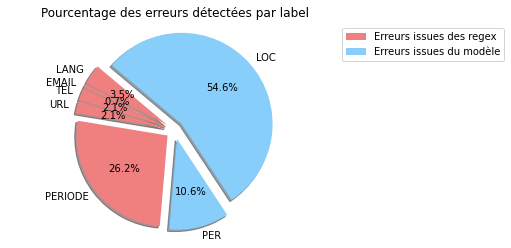

In [23]:
nbr_regex_colors = ['lightcoral'] * len(dict_error_regex.values())
nbr_model_colors = ['lightskyblue'] * len(dict_error_model.values())
labels = list(dict_error_regex.keys())+list(dict_error_model.keys())
sizes = list(dict_error_regex.values())+list(dict_error_model.values())
colors = nbr_regex_colors+nbr_model_colors
explode = [0.1]* len(nbr_regex_colors+nbr_model_colors) 
plt.pie(sizes, labels=labels, colors=colors, explode=explode ,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pourcentage des erreurs détectées par label')
plt.axis('equal')
plt.legend([
        Patch(facecolor='lightcoral'),
        Patch(facecolor='lightskyblue')
    ], ["Erreurs issues des regex", "Erreurs issues du modèle"], bbox_to_anchor=[1.5, 1], 
           loc='upper right', ncol=1)
plt.show()